In [23]:
%pip install scipy sympy numpy matplotlib ipympl
%matplotlib widget


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from numpy import sqrt, array, isclose, divide
from numpy.linalg import norm
import sympy as sp
from sympy.utilities import lambdify

In [25]:
# hand xyz
hx = sp.symbols('hx')
hy = sp.symbols('hy')
hz = sp.symbols('hz')

# hand direction xyz
dx = sp.symbols('dx')
dy = sp.symbols('dy')
dz = sp.symbols('dz')

# length of hand cage, total string length
lc = sp.symbols('lc')
ls = sp.symbols('ls')

# string length constraint equation
# introduce parameter x which is the distance the pulley is from the bottom of the pulley cage
x = sp.symbols('x')

hand_to_end_of_cage = lc - x
top_to_bottom_of_cage = lc
base_of_cage_to_origin = sp.sqrt((hx - dx*x)**2 + (hy - dy*x)**2 + (hz - dz*x)**2)

# so for the total string length to be consistent the following equation must be 0
f = hand_to_end_of_cage + top_to_bottom_of_cage + base_of_cage_to_origin - ls

f = sp.simplify(f)
f = lambdify((x, hx, hy, hz, dx, dy, dz, lc, ls), f)

In [26]:
def get_hand_in_cage_position(hand_pos, hand_dir, lc, ls):
    x0 = 0.0
    hx, hy, hz = hand_pos
    dx, dy, dz = hand_dir
    return fsolve(f, x0, args=(hx, hy, hz, dx, dy, dz, lc, ls))

def get_cage_position(x, hand_pos, hand_dir):
    return hand_pos - x * hand_dir

def get_cage_top_position(x, hand_pos, hand_dir, lc):
    return get_cage_position(x - lc, hand_pos, hand_dir)

average execution time: 64.20683860778809us


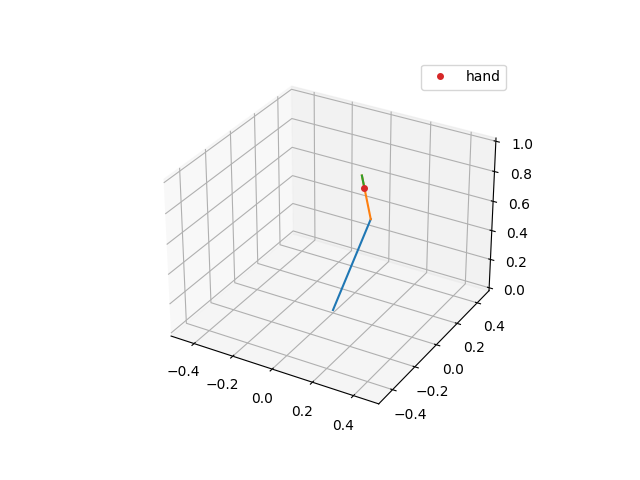

In [27]:
hand_pos = array([0.1, 0.1, 0.8])
hand_dir = array([-0.1, -0.1, 1])
hand_dir = divide(hand_dir, norm(hand_dir))
pulley_length = 0.3
string_length = 1.0
ratio = 1
x0 = [0,]

import time
times = []
for i in range(1000):
    start = time.time()
    x = get_hand_in_cage_position(hand_pos, hand_dir, pulley_length, string_length)[0]
    times.append(time.time() - start)
print(f'average execution time: {sum(times)/len(times)*1000000}us')

cage_pos = get_cage_position(x, hand_pos, hand_dir)
cage_top_pos = get_cage_top_position(x, hand_pos, hand_dir, pulley_length)

ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(0, 1)
ax.plot([0, cage_pos[0]], [0, cage_pos[1]], zs=[0, cage_pos[2]])
ax.plot([cage_pos[0], cage_top_pos[0]], [cage_pos[1], cage_top_pos[1]], zs=[cage_pos[2], cage_top_pos[2]])
ax.plot([cage_top_pos[0], hand_pos[0]], [cage_top_pos[1], hand_pos[1]], zs=[cage_top_pos[2], hand_pos[2]])
ax.plot(*hand_pos, 'o', markersize=4, label='hand')
ax.legend()